# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/dlcourse2018_students

Fall Semester 2018

# Calculus

## Learning Goals

- Understand the concept of a derivative
- Understand the concept of a derivative as a limit
- Understand how to approximate a derivative
- Understand the main idea of gradient descent

## Library import

In [72]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
# Reference: https://matplotlib.org/users/usetex.html

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# A function and its derivative

Given a function  $f(x)$ of one dimensional argument $x$ its derivative is indicated with the notation

$$
\frac{df(x)}{dx}
$$

and it measures how steep a function is at a certain point, or how fast it changes at that point. For example given the function 

$$
f(x) = x^2
$$

its derivative is given by

$$
\frac{df(x)}{dx} = 2x
$$

Reference: https://en.wikipedia.org/wiki/Derivative

The derivative can be approximated by the following formula

$$
\frac{f(x_0+h)-f(x_0)}{h}
$$

the approximation is better for smaller values of $h$. If you know what a limit is, the exact value for the derivative can be written as

$$
\frac{df(x_0)}{dx} = \lim_{h\rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h}
$$

Let's consider our function $f(x)$ and let's plot the tangent to the function $f(x)$ at $x=2$ for various values of $h$.

In [4]:
def f(x):
    return x**2

In [83]:
x = np.arange(-5,8,0.1)

In [93]:
h = 4
der1 = (f(2+h)-f(2))/h

h = 2
der2 = (f(2+h)-f(2))/h

h = 0.01
der3 = (f(2+h)-f(2))/h

In [88]:
f(2)

4

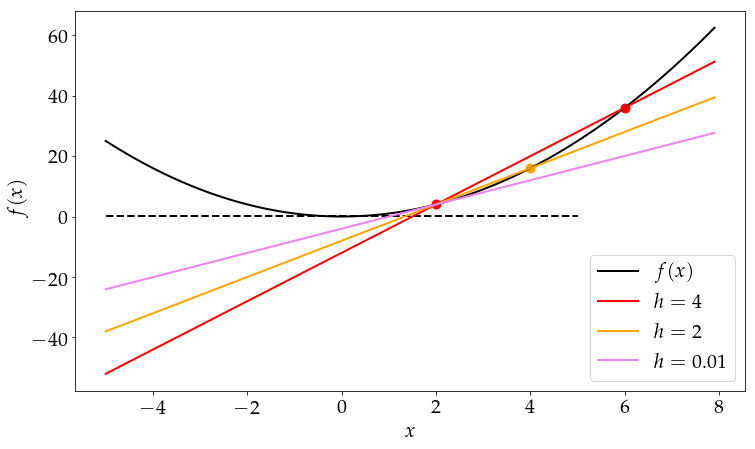

In [97]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x,f(x), color = 'black', alpha = 1, linewidth = 2, label = '$f(x)$')
plt.plot(x, der1*(x-2)+f(2), color = 'red', linewidth = 2,label = '$h=4$')
plt.plot(x, der2*(x-2)+f(2), color = 'orange', linewidth = 2,label = '$h=2$')
plt.plot(x, der3*(x-2)+f(2), color = 'violet', linewidth = 2,label = '$h=0.01$')
plt.scatter(2,4, s = 80, color = 'red')
plt.scatter(6,36, s = 80, color = 'red')
plt.scatter(4,16, s = 80, color = 'orange')
plt.hlines(y=0.2, xmin=-5, xmax=5, linewidth=2, color='black', linestyles= 'dashed')
ax.set_xlabel('$x$', fontsize = 20)
ax.set_ylabel('$f(x)$', fontsize = 20)
plt.legend(fontsize = 20)
plt.tick_params(labelsize=20)

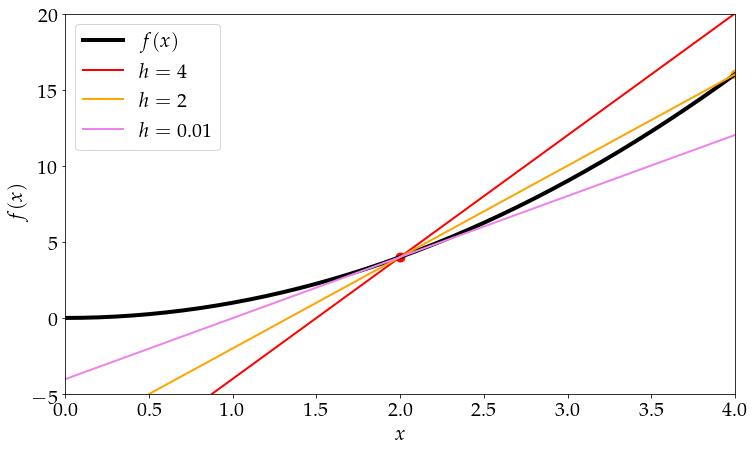

In [103]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x,f(x), color = 'black', alpha = 1, linewidth = 4, label = '$f(x)$')
plt.plot(x, der1*(x-2)+f(2), color = 'red', linewidth = 2,label = '$h=4$')
plt.plot(x, der2*(x-2)+f(2), color = 'orange', linewidth = 2,label = '$h=2$')
plt.plot(x, der3*(x-2)+f(2), color = 'violet', linewidth = 2,label = '$h=0.01$')
plt.scatter(2,4, s = 80, color = 'red')
plt.scatter(6,36, s = 80, color = 'red')
plt.scatter(4,16, s = 80, color = 'orange')
#plt.hlines(y=0.2, xmin=-2, xmax=4, linewidth=2, color='black', linestyles= 'dashed')
ax.set_xlabel('$x$', fontsize = 20)
ax.set_ylabel('$f(x)$', fontsize = 20)
plt.xlim(0,4)
plt.ylim(-5,20)
plt.legend(fontsize = 20)
plt.tick_params(labelsize=20)

## Plot of the tangent of $f(x)$ at differente locations

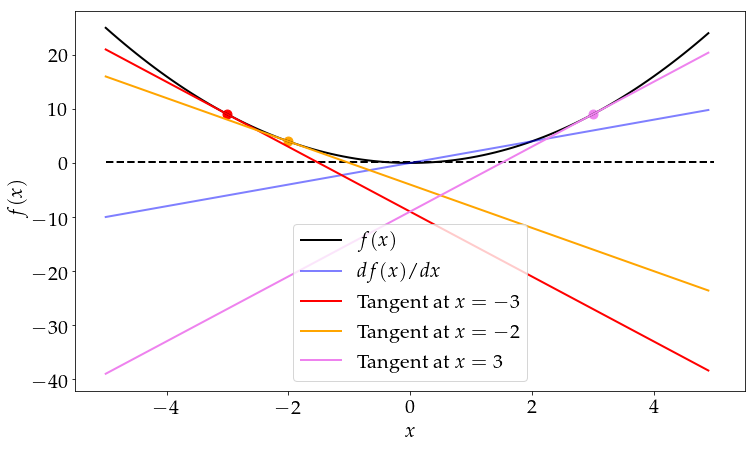

In [73]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x,f(x), color = 'black', alpha = 1, linewidth = 2, label = '$f(x)$')
plt.plot(x, 2*x, color = 'blue', alpha = 0.5, linewidth = 2, label = '$df(x)/dx$')
plt.plot(x, -6*x-9, color = 'red', linewidth = 2,label = 'Tangent at $x=-3$')
plt.plot(x, -4*x-4, color = 'orange', linewidth = 2,label = 'Tangent at $x=-2$')
plt.plot(x, 6*x-9, color = 'violet', linewidth = 2,label = 'Tangent at $x=3$')
plt.scatter(-3,9, s = 80, color = 'red')
plt.scatter(-2,4, s = 80, color = 'orange')
plt.scatter(3,9, s = 80, color = 'violet')
plt.hlines(y=0.2, xmin=-5, xmax=5, linewidth=2, color='black', linestyles= 'dashed')
ax.set_xlabel('$x$', fontsize = 20)
ax.set_ylabel('$f(x)$', fontsize = 20)
plt.legend(fontsize = 20)
plt.tick_params(labelsize=20)

## Exercise 1 (difficulty: easy)

given the function

$$
f(x)=3+x^3
$$

and its derivative

$$
\frac{df(x)}{dx} = 3x^2
$$

do the following

1. Evaluate the derivative at the point 5, 6 and 10
2. Plot the derivative function and the function together and interpret the two functions.

## Exercise 2 (difficulty: medium)

Ignoring the conditions in which this is true, for a function $f(x)$ in one dimensions that are continous and differentiable in a specific rage one can find the location of the minimum or maximum solving the equation

$$
\frac{df(x)}{dx} = 0
$$

Given the function

$$
f(x) = 3x+x^2+2
$$

find numerically the minimum or maximum (and identify which one is) using the equation

$$
\frac{df(x)}{dx} = 3+2x = 0
$$



## Exercise 3 (difficulty: hard)

Consider again the function given in the previous exercise

$$
f(x) = 3x+x^2+2
$$

consider the following numerical series

$$
a_{n+1} = a_n - \gamma \frac{df(a_n)}{dx}
$$

Check numerically that, starting from a random value for $a_0$, the sequence $a_n$ converges to the minimum you found in the previous exercise. Check the method with several values of $\gamma$. What do you observe for big or small values? Can you compare the speed of convergence?

If you want to read more on this method you can check here: https://en.wikipedia.org/wiki/Gradient_descent

# Numerical derivative of a function and its approximation

You can actually evaluate numerically the derivative of a function $f(x)$ in a point $x_0$ using the following approximation

$$
\frac{f(x_0+h)-f(x_0)}{h}
$$

The smallest $h$, the better the approximation (check here for more information https://en.wikipedia.org/wiki/Numerical_differentiation).

## Exercise 4 (difficulty: medium)

Calculate the approximation for the function given in exercise 2 and plot it together with the exact result. Plot the approximation for the values of $h=0.01, 0.1, 0.5$.

## Exercise 5 (difficulty: easy)

Considering the approximation given above, show that for a linear function

$$
f(x) = a + bx
$$

the approximation is equal to $b$, that is the exact value of the derivative of $f(x)$.

# Derivatives in more dimensions (and the gradient)

Explanation in class of a derivative in more dimensions.